In [10]:
import scipy.io.wavfile as waves #biblioteca para procesar audio .wav en python
import scipy as sp # for signal processing
import IPython.display as ipd
import numpy as np
import makelab
from makelab import signal
#from functools import cache,lru_cache
%matplotlib inline

Libreria makelab diseñada y escrita por el profesor Jon E. Froehlich de la Univerdidad de Washington con ayuda de estudiantes con permiso de uso libre para fines educativos

In [11]:
# INGRESO
# archivo = input('archivo de audio: ')
'''
arch=input('ingrese el nombre del archivo: ')
archivo=(arch +'.wav')
'''
archivo = 'Alarm01.wav' #archivo de entrada

In [12]:
# PROCEDIMIENTO

fs, sonido = sp.io.wavfile.read(archivo) #biblioteca lee el archivo de audio y devuelve la frecuencia de muestreo y la cuantizacion para la cantidad de muestras del (monofonoico y estrereo)
tamano_sonido = len(sonido)#devuelve la cantidad de simbolos v(k) del audio digitalizado
#trabajar con un solo canal de audio
tamano = np.shape(sonido) #divide ambos vectores de canales
#muestras = tamano[0]
m = len(tamano) #cantidad de canales de las muestras de audio
canales = 1  # monofónico
if (m>1):  # estéreo
    canales = tamano[1]
# experimento con un canal
if (canales>1):
    canal = 0
    vT = sonido[:,canal] 
else:
    vT = sonido
#vT corresponde a la senal cuantizada para el canal de audio seleccionado
print(vT)
longitud_del_audio_en_sec=vT.shape[0]/fs
bits = 16 #cantidad de bits para cuantizacion
#@lru_cache(maxsize=16)


[0 0 0 ... 0 0 0]


In [13]:
simbolos = np.zeros(len(vT)) #cantidad de símbolos
# Conversión de muestras a símbolos
for i in range(0,len(simbolos)):
    simbolos[i] = (2**16)/2 + vT[i]
    
# Se aplica una codificacion de longitud fija convirtiendo
# el numero decimal de cada simbolo a binario de 16 bits

bkT = np.zeros(16*len(simbolos)) # vector para los bits

# Conversión de decimal a binario de los simbolos
for i in range(0,len(simbolos)):
    num = simbolos[i]
    for j in range(0,16):
        if num >= 2**(16-1-j):
            bkT[16*i+j] = 1
            num = num - 2**(16-1-j)
        else:
            bkT[16*i+j] = 0

bkT = bkT.astype(int) # bits a la salida del codificador
print(bkT)

[1 0 0 ... 0 0 0]


In [14]:
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Numero de canales de senal = {len(sonido.shape)}")
print(f"Cantidad de muestras del canal: {sonido.shape[0]}")
print(f"Duracion del audio = {longitud_del_audio_en_sec}s")
print(f"{bits}-Los niveles de cuantizacion van de -{2**(bits - 1)} a {2**(bits - 1) - 1}")
print(f"Valor de amplitutud maximo de la senal de audio: {np.max(vT)}")

Frecuencia de muestreo: 22050 Hz
Numero de canales de senal = 2
Cantidad de muestras del canal: 122868
Duracion del audio = 5.572244897959184s
16-Los niveles de cuantizacion van de -32768 a 32767
Valor de amplitutud maximo de la senal de audio: 9280


##Senal con nivel de cuantizacion original

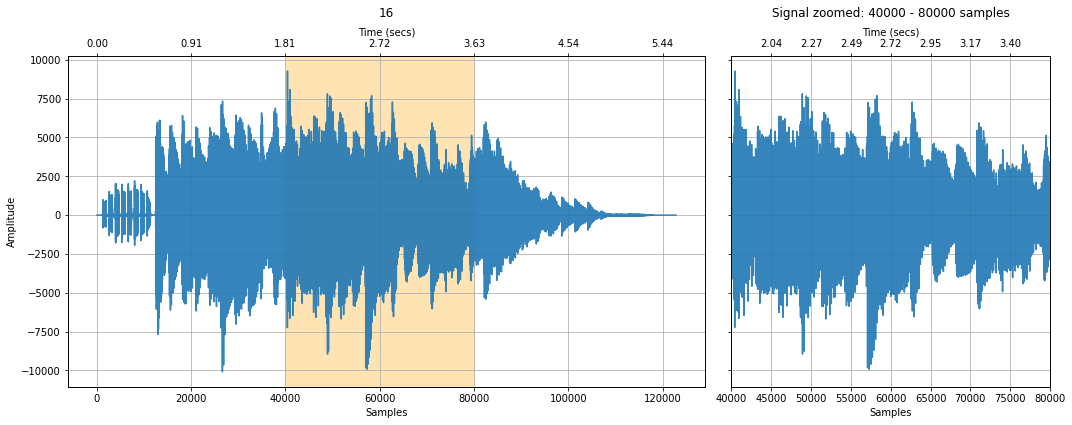

In [15]:
xlim_zoom = (40000, 80000) # zoom de la senal muestreada
makelab.signal.plot_signal(vT, fs, bits, xlim_zoom = xlim_zoom) #plotear vector de bits que muestran los valores cuantizados vs la cantidad de muestras y vs el tiempo
ipd.Audio(vT, rate=fs)

##Cuantizacion a 4 bits

In [16]:
def cambiar_cuantizacion(bits_cuantiazcion,bit_senal):
    bkR = vT / 2**bit_senal # bits de la senal original 
    vR = bkR * 2**bits_cuantiazcion # (nueva cuantizacion de la senal)
    vR = vR.astype(int) #pasar a valores enteteros (agregan error cuantizacion)
    print(f"{bits_cuantiazcion} bits de cuantizacion tienen nivel de cuantizacion de {2**(bits_cuantiazcion - 1)} a {2**(bits_cuantiazcion - 1) - 1}")
    print(f"valor maximo de la senal: {np.max(vR)}")
    return bits_cuantiazcion,bit_senal,vR

4 bits de cuantizacion tienen nivel de cuantizacion de 8 a 7
valor maximo de la senal: 2


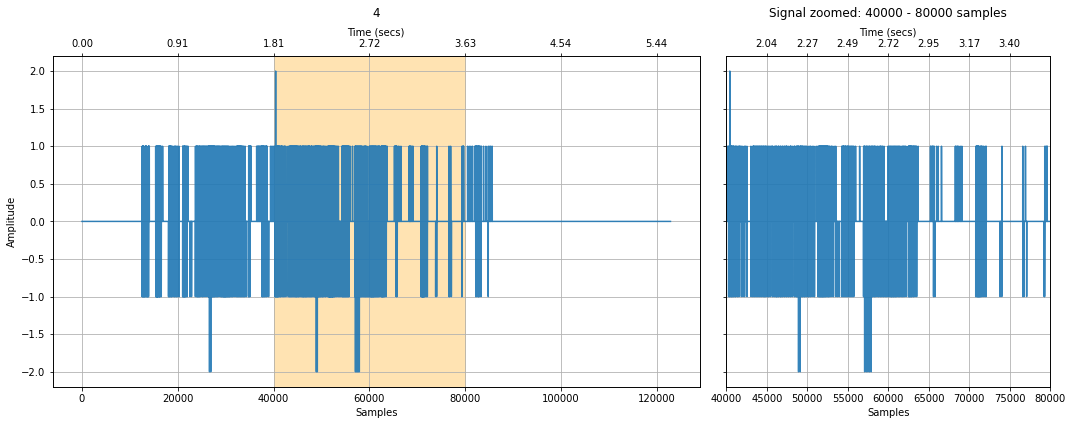

In [17]:
bits_cuantiazcion,bit_senal,btK_4_b=cambiar_cuantizacion(4,16)
makelab.signal.plot_signal(btK_4_b, fs, bits_cuantiazcion, xlim_zoom = xlim_zoom)
ipd.Audio(btK_4_b, rate=fs)

In [18]:
#escribir y guardar archivo .wav
parte = vT[:]
print('archivo de parte[] grabado...')
waves.write('resultado.wav', fs, parte)

archivo de parte[] grabado...
